In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from tqdm import tqdm

### A. Plot P(X= i) for a reasonable interval of X and α∈{0.01,0.1,0.5,1}.

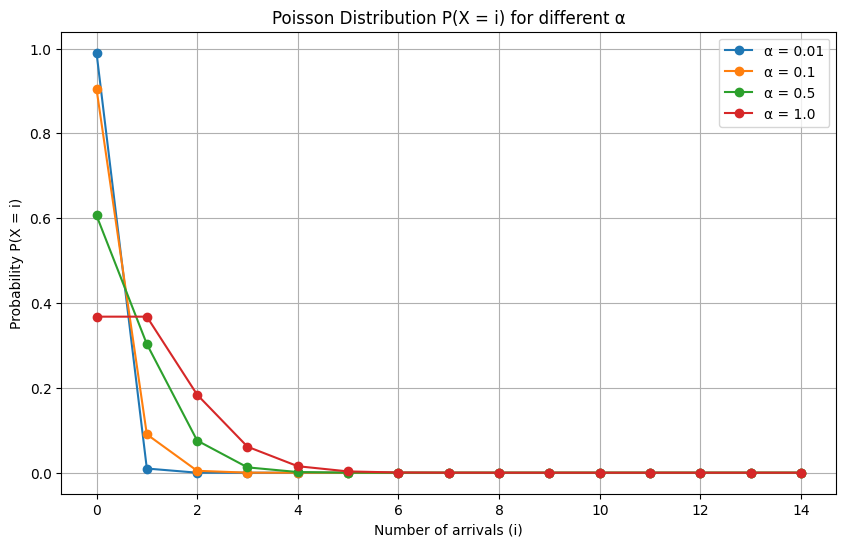

In [5]:
alphas = [0.01, 0.1, 0.5, 1.0]
i = np.arange(0, 15)

plt.figure(figsize=(10, 6))

for alpha in alphas:
    pmf = poisson.pmf(i, mu=alpha)
    plt.plot(i, pmf, marker='o', label=f'α = {alpha}')

plt.title('Poisson Distribution P(X = i) for different α')
plt.xlabel('Number of arrivals (i)')
plt.ylabel('Probability P(X = i)')
plt.legend()
plt.grid(True)
plt.show()


### B. Implement a program that samples numbers of incoming data from P(X= i).

1000
First 20 sampled arrival values for Alpha =  0.01  :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


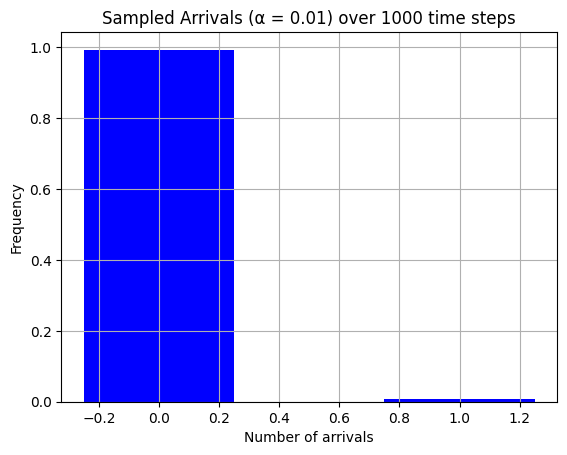

1000
First 20 sampled arrival values for Alpha =  0.1  :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


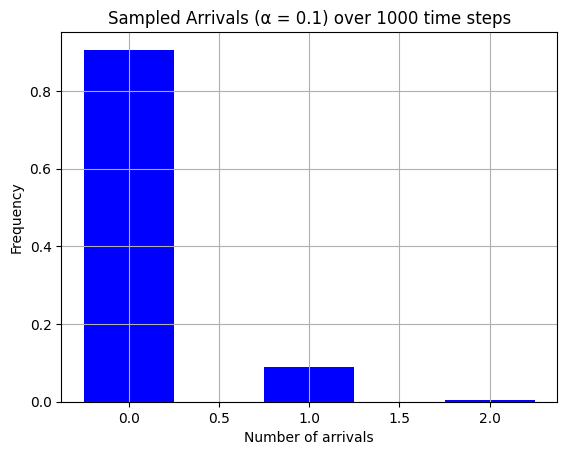

1000
First 20 sampled arrival values for Alpha =  0.5  :  [0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 2 0 1 0 1]


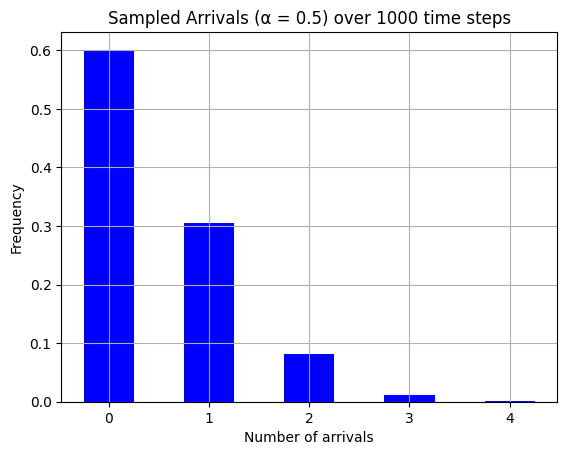

1000
First 20 sampled arrival values for Alpha =  1.0  :  [0 0 3 4 3 0 1 2 2 2 1 2 1 1 1 0 0 0 0 1]


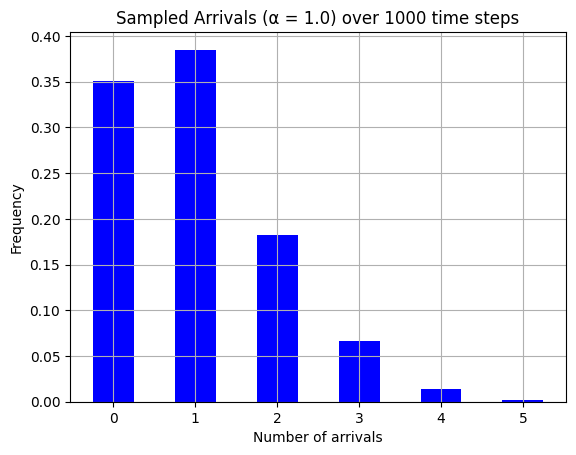

In [9]:
alphas = [0.01, 0.1, 0.5, 1.0]
num_samples = 1000

for alpha in alphas:
    samples = np.random.poisson(lam=alpha, size=num_samples)
    print(len(samples))
    print("First 20 sampled arrival values for Alpha = ", alpha, " : ", samples[:20])

# Plot a histogram to show the distribution of sampled values
    plt.hist(samples, bins=range(0, max(samples)+2), align='left', rwidth=0.5, color='blue', density=True)
    plt.title(f'Sampled Arrivals (α = {alpha}) over {num_samples} time steps')
    plt.xlabel('Number of arrivals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### C. Implement a model that iterates over these two phases: calculate and administrate new incoming data, then operate on the current data (one at a time). Generate a sample of 2000 time steps for α= 0.1 and a processing duration of 4 steps per data. What is the average length of the waiting list?

Average waiting list length over 2000 steps: 0.4655


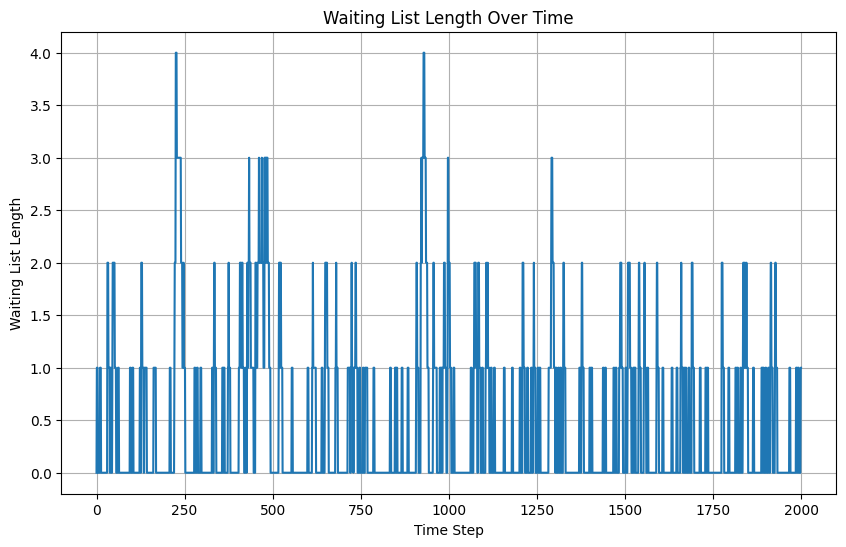

In [ ]:
alpha = 0.1
num_time_steps = 2000
processing_duration = 4

# Initialization
np.random.seed(42)  # for reproducibility
waiting_list = []  # Each item represents remaining processing time
queue_lengths = []

# Simulation
for t in range(num_time_steps):
    # Phase 1: New incoming data
    new_data = np.random.poisson(lam=alpha)
    waiting_list.extend([processing_duration] * new_data)
    
    # Phase 2: Operate on current data
    if waiting_list:
        waiting_list[0] -= 1  # Process the first item
        if waiting_list[0] == 0:
            waiting_list.pop(0)  # Remove if processing is complete
    
    # Record the queue length
    queue_lengths.append(len(waiting_list))

# Final Results
average_queue_length = np.mean(queue_lengths)
print(f"Average waiting list length over {num_time_steps} steps: {average_queue_length:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(queue_lengths)
plt.xlabel('Time Step')
plt.ylabel('Waiting List Length')
plt.title('Waiting List Length Over Time')
plt.grid(True)
plt.show()

### D. Change your program such that you can average the waiting time list length over many sample (independent runs of your model over 2000 time steps each). Determine the average list length for rates α∈[0.005,0.25] in steps of 0.005 based on 200 samples and plot it.

In [6]:
def simulate_waiting_list_batch(alpha_values, num_samples=200, num_time_steps=2000, processing_duration=4):
    """
    Simulate many alphas at once much faster.
    """
    results = []
    
    for alpha in tqdm(alpha_values, desc=f"Simulating (processing duration = {processing_duration})"):
        np.random.seed(42)  # Same seed for fairness
        all_samples = np.random.poisson(lam=alpha, size=(num_samples, num_time_steps))
        avg_lengths = []

        for sample in all_samples:
            waiting_list = []
            queue_lengths = []

            for arrivals in sample:
                waiting_list.extend([processing_duration] * arrivals)

                if waiting_list:
                    waiting_list[0] -= 1
                    if waiting_list[0] == 0:
                        waiting_list.pop(0)

                queue_lengths.append(len(waiting_list))

            avg_lengths.append(np.mean(queue_lengths))

        results.append(np.mean(avg_lengths))
    
    return results

# TASK D: processing duration = 4 steps
alphas_d = np.arange(0.005, 0.255, 0.005)
average_list_lengths_d = simulate_waiting_list_batch(alphas_d, num_samples=200, processing_duration=4)

Simulating (processing duration = 4): 100%|██████████| 50/50 [00:06<00:00,  7.55it/s]


### E. Do the same for a processing duration of only 2 steps per data with rates α ∈[0.005,0.5] in steps of 0.005. Compare the two plots.

Simulating (processing duration = 2): 100%|██████████| 10/10 [00:01<00:00,  7.58it/s]


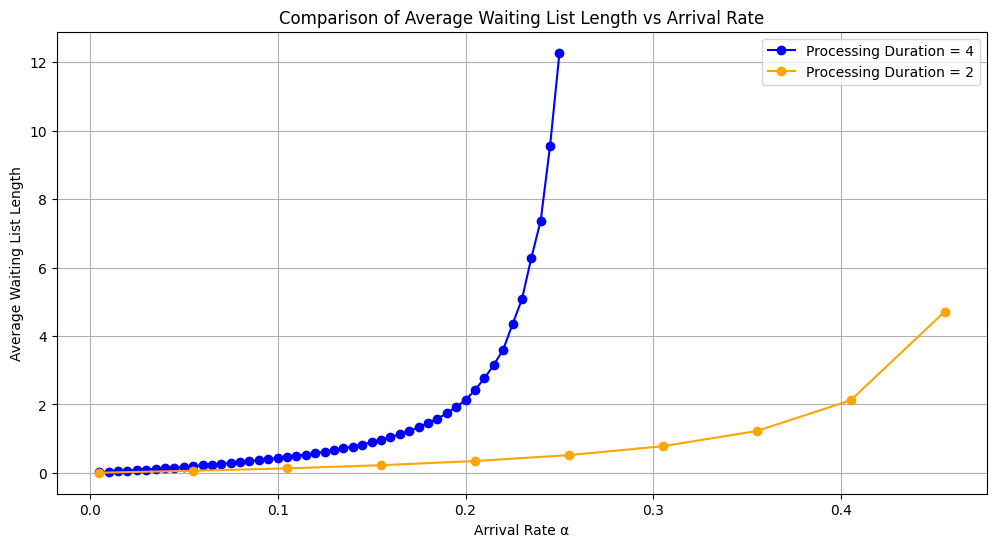

In [8]:
# TASK E: processing duration = 2 steps
alphas_e = np.arange(0.005, 0.505, 0.05)
average_list_lengths_e = simulate_waiting_list_batch(alphas_e, num_samples=200, processing_duration=2)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(alphas_d, average_list_lengths_d, marker='o', linestyle='-', color='blue', label='Processing Duration = 4')
plt.plot(alphas_e, average_list_lengths_e, marker='o', linestyle='-', color='orange', label='Processing Duration = 2')
plt.xlabel('Arrival Rate α')
plt.ylabel('Average Waiting List Length')
plt.title('Comparison of Average Waiting List Length vs Arrival Rate')
plt.legend()
plt.grid(True)
plt.show()

### Comparison of Task D and Task E

| Aspect | Processing Duration = 4 steps (Task D) | Processing Duration = 2 steps (Task E) |
|:-------|:---------------------------------------|:---------------------------------------|
| **Arrival Rate Range** | 0.005 to 0.25 | 0.005 to 0.5 |
| **Average Waiting List Growth** | Grows faster | Grows slower |
| **Curve Shape** | Steeper (queue length increases quickly) | Flatter (queue length increases slowly) |
| **Behavior at Low Arrival Rates** | Small but noticeable queue even at low α | Almost no queue at very low α |
| **Behavior at Higher Arrival Rates** | Queue grows large quickly | Queue remains manageable longer |
| **System Sensitivity** | More sensitive to increases in arrival rate | More robust against higher arrival rates |
| **General Trend** | System overloads earlier | System handles more load without long queues |

---

### Key Observations:

- A **longer processing duration** (4 steps) causes the system to accumulate a waiting list much faster even at low arrival rates.
- A **shorter processing duration** (2 steps) makes the system more efficient, allowing it to handle a much larger range of arrival rates before the queue becomes significant.
- **Conclusion**: Faster processing (shorter service times) significantly improves system performance by reducing queue buildup.

---

### Visual Summary:

- **Blue curve** (duration = 4) rises quickly → system gets congested earlier.
- **Orange curve** (duration = 2) rises slowly → system can handle more load before congestion.

